In [1]:
import torch
from PIL import Image
from torchvision.transforms import functional as F

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import torch

# Carregar modelo RT-DETR
model = torch.hub.load('facebookresearch/detr', 'detr_resnet50', pretrained=True)
model.eval()



def plotBoxPredicted(model, image_path, threshold):

   # Carregar e preparar imagem
    image = Image.open(image_path)
    input_tensor = F.to_tensor(image).unsqueeze(0)

    # Fazer inferência
    output = model(input_tensor) 

    # Exibir os resultados
    #print(output)

    # Aplicar softmax para obter probabilidades
    probs = torch.softmax(output['pred_logits'][0], dim=-1)

    # Obter a classe com maior probabilidade (ignorando a última classe "sem objeto")
    scores, labels = probs[:, :-1].max(dim=-1)


    keep = scores > threshold

    filtered_boxes = output['pred_boxes'][0][keep]  # Caixas filtradas
    filtered_scores = scores[keep]  # Pontuações filtradas
    filtered_labels = labels[keep]  # Classes filtradas



    # Lista das classes COCO
    coco_classes = [
        "person", "bicycle", "car", "motorcycle", "airplane", "bus", "train", "truck", "boat",
        "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat",
        "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack",
        "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball",
        "kite", "baseball bat", "baseball glove", "skateboard", "surfboard", "tennis racket",
        "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana", "apple",
        "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", "chair",
        "couch", "potted plant", "bed", "dining table", "toilet", "tv", "laptop", "mouse", "remote",
        "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator", "book",
        "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush", "banner", "blanket",
        "bridge", "cardboard", "counter", "curtain", "door-stuff", "floor-wood", "flower", "fruit",
        "gravel", "house", "light", "mirror-stuff", "net", "pillow", "platform", "playingfield",
        "railroad", "river", "road", "roof", "sand", "sea", "shelf", "snow", "stairs", "tent",
        "towel", "wall-brick", "wall-stone", "wall-tile", "wall-wood", "water-other", "window-blind",
        "window-other", "tree", "fence", "ceiling", "sky-other", "cabinet", "table", "floor-other",
        "pavement", "mountain", "grass", "dirt", "paper", "food-other", "building-other",
        "rock", "wall-other", "rug"
    ]

    # Caminho da imagem
    #image_path = "caminho/para/sua/imagem.jpg"

    # Carregar a imagem original
    image = Image.open(image_path)
    width, height = image.size

    # Obter probabilidades a partir dos logits
    logits = output['pred_logits'][0]  # Pegando apenas a primeira imagem no batch
    probs = torch.softmax(logits, dim=-1)

    # Ignorar a última classe ("sem objeto")
    scores, labels = probs[:, :-1].max(dim=-1)

    # Definir limiar de confiança
    threshold = 0.5
    keep = scores > threshold

    # Filtrar caixas, pontuações e classes
    filtered_boxes = output['pred_boxes'][0][keep].detach().cpu().numpy()  # Selecionar caixas relevantes
    filtered_scores = scores[keep].detach().cpu().numpy()  # Selecionar pontuações relevantes
    filtered_labels = labels[keep].detach().cpu().numpy()  # Selecionar rótulos relevantes

    # Converter caixas normalizadas para coordenadas absolutas
    absolute_boxes = []
    for box in filtered_boxes:
        x_centro, y_centro, largura, altura = box
        x_min = (x_centro - largura / 2) * width
        y_min = (y_centro - altura / 2) * height
        x_max = (x_centro + largura / 2) * width
        y_max = (y_centro + altura / 2) * height
        absolute_boxes.append([x_min, y_min, x_max - x_min, y_max - y_min])  # [x_min, y_min, largura, altura]

    # Visualizar a imagem com as caixas e os nomes das classes
    fig, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(image)

    for box, score, label in zip(absolute_boxes, filtered_scores, filtered_labels):
        x_min, y_min, width, height = box
        rect = patches.Rectangle(
            (x_min, y_min), width, height, linewidth=2, edgecolor="red", facecolor="none"
        )
        ax.add_patch(rect)
        class_name = coco_classes[int(label)]  # Nome da classe
        ax.text(
            x_min, y_min - 10, f"{class_name}: {score:.2f}", color="red", fontsize=12, backgroundcolor="white"
        )

    plt.axis("off")
    plt.show()

Using cache found in /Users/rogeriolopes/.cache/torch/hub/facebookresearch_detr_main
/Users/rogeriolopes/Library/CloudStorage/OneDrive-Pessoal/Documentos/PhD/DeepLearning/venv/rtdetr_env/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/rogeriolopes/Library/CloudStorage/OneDrive-Pessoal/Documentos/PhD/DeepLearning/venv/rtdetr_env/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


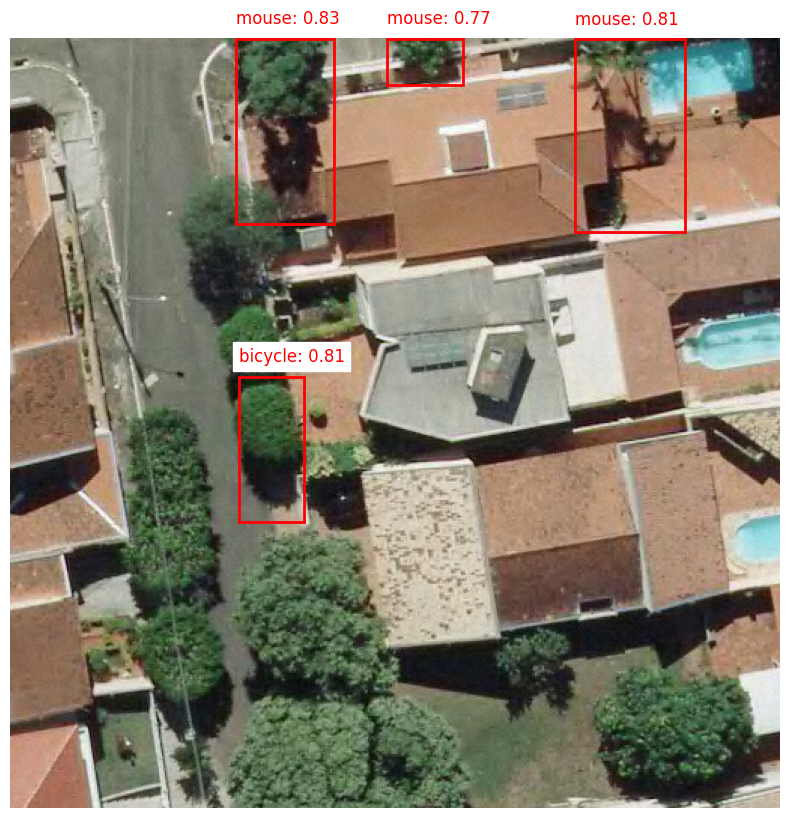

In [3]:
# Caminho para a imagem
image_path = "../benchYolo/rgb/16.png"
threshold = 0.1
plotBoxPredicted(model, image_path, threshold)